# 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
#this specifies the path for python to read the file
churn_path = "../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"

data = pd.read_csv(churn_path)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#turns the target into numerical data
data["Churn"] = le.fit_transform(data["Churn"])
data["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
# separate target data and features and placed into their own variables
y = data["Churn"]
X = data.drop(["Churn"], axis=1)

# divides data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [5]:
# Categorical columns, or columns with characters that are not numbers
object_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == "object"]
# This takes the number of unique values in each column
object_nunique = list(map(lambda col: X_train_full[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column
sorted(d.items(), key=lambda x: x[1])

[('gender', 2),
 ('Partner', 2),
 ('Dependents', 2),
 ('PhoneService', 2),
 ('PaperlessBilling', 2),
 ('MultipleLines', 3),
 ('InternetService', 3),
 ('OnlineSecurity', 3),
 ('OnlineBackup', 3),
 ('DeviceProtection', 3),
 ('TechSupport', 3),
 ('StreamingTV', 3),
 ('StreamingMovies', 3),
 ('Contract', 3),
 ('PaymentMethod', 4),
 ('TotalCharges', 5277),
 ('customerID', 5634)]

In [6]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

X_train.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges
2920,Female,Yes,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,0,72,85.10
2966,Female,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,14,46.35
6099,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0,71,24.70
5482,Male,Yes,Yes,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,33,73.90
2012,Female,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,0,47,98.75


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression

#using the logistic regression as our model
model = LogisticRegression(max_iter=1000, random_state=0)

# Bundles preprocessing, such as imputing and one hot encoding
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# after preprocessing
my_pipeline.fit(X_train, y_train)

# gets preditcions
preds = my_pipeline.predict(X_valid)

preds

array([0, 0, 0, ..., 0, 0, 0])

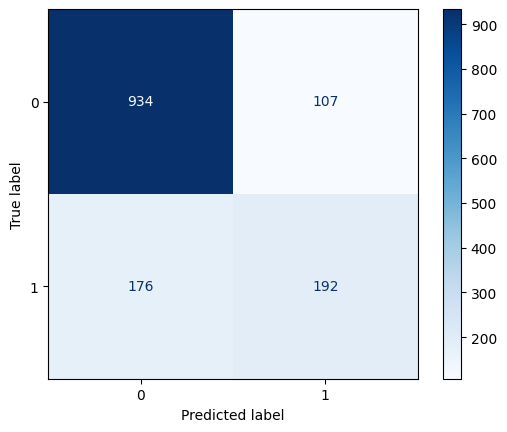

In [9]:
#imports the metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
#plt lets us use visual guides for our data
import matplotlib.pyplot as plt

#builds the confusion matrix
cm = confusion_matrix(y_valid, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap="Blues")
plt.grid(False)
plt.show()

In [10]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In this dataset I will be predicting if a customer will leave the service given various data such as gender, phone sevice, security, tech support availability and others. First, I import the necessary libraries and the dataset into python.

Using pandas, I placed the csv into a variable so we can make a dataframe for it.
After looking through the data, I used label encoder to change the target, Churn, from a Yes or No value to 1s and 0s.

Next, I imported train_test_split, assigned the target to y and the features to X. I also divided the data into test and training sets, again using an 80% to 20% split as is the general convention. I could have dropped customer ID from the data here, but it will get dropped later on by the pipeline anyway.

I checked to see which categorical columns in the dataset have high cardinality. TotalCharges and customerID have really high cardinality, which will generate too much entries if we use one hot encoding. We'll drop those columns later during preprocessing.

Using pipelines makes it easier for me to clean up the data before predictions. In this process, it will check each column with object data and group it as categorical columns and check each column with numerical data and group them as numerical columns. Categorical columns with more than 10 unique entries will be dropped and the rest will be transformed into numerical data with one hot encoding. One hot encoding will create new columns for each unique value a column has to indicate the prescence of a value. Any data with empty entries will also be imputed, meaning they will be replaced with the mean of that column.

After all of this, I use Logistic Regression because our target is only two things: whether the customer leaves or stays. We then fit our data and make our predictions.

We now have an array of our predictions. 0 for no churn which means the customer stays, and 1 for churn which means the customer stays.
Next, we can evaluate our model on how well it did by checking accuracy score, classification report, or confusion matrix.
In our confusion matrix we can see in our top left square showing 934, the true positives. These mean that actual label and predicted labels match or show a 0 value for no churn. On the lower right square are the true negatives, which show a 1 value for both predicted and actual labels. The upper right and lower left squares show the number of times the predictions don't match the actual values.

We can infer here that our model had a great chance of predicting when the customer stays or "no churn" but didn't do as well when predicting when they would leave.

Another way to evaluate the model would be the classification report.Precision takes the number of times the prediction matches and divides it by the number of times it predicted it wether it was right or wrong. Here it has a precision rate of 0.84 for the value of 0. It means that it has 934 right answers divided by 1110 total guesses. The closer a value is to 1, shows how accurate our model is.

Recall is the number of correct predictions of a certain class divided by the sum of the correct predictions of that class, and the wrong predictions of that class. In our confusion matrix, we have 934 correct predictions for the value of 0, divide that by the sum of that same number plus 107, the number of wrong predictions for that same value.

The f1 score is the mean of both the precision and recall values.

In the end, using logistical regression with this dataset has been greatly successful for correctly predicting customer retention, however it could use a bit more work in correctly predicting when customer churn happens.